In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("sales_data.db")

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
sample_data = [
    ("Product A", 10, 20.5),
    ("Product B", 5, 50.0),
    ("Product C", 20, 15.0)
]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

In [7]:
conn.commit()

In [8]:
conn.close()

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
conn = sqlite3.connect("sales_data.db")

In [11]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [12]:
df = pd.read_sql_query(query, conn)

In [14]:
print(df)

     product  total_qty  revenue
0  Product A         10    205.0
1  Product B          5    250.0
2  Product C         20    300.0


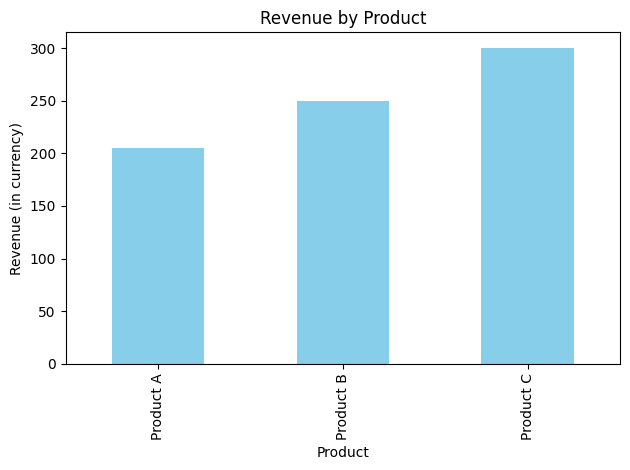

In [18]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (in currency)")
plt.tight_layout()

In [19]:
plt.savefig("sales_chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
conn.close()